In [50]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
from nltk.tokenize import word_tokenize
from nltk import pos_tag

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-50-cf141d2e4c3c>:48: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


In [51]:
# set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [52]:
#Read in from pandas
columnNames = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
               'date_stamp','streetAddress', 'City',
               'Province','postalCode']

hotelDf = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/kingston-mx50.csv',
                          header=None,
                          names=columnNames)

hotelDf['numReviews'] = hotelDf.groupby('hotelName')['reviewColumn'].transform('count')

In [53]:
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode,numReviews
0,data_kingston_50/ca/154992/9160041/885042479.html,Quality Inn &amp; Suites,"""Great room, great service, standard hotel breakfast. Decent coffee. However don't count on the internet, couldn't enter my virtual meetings even without video. Let alone stream a tv show or YouTube. Other then that it was a safe, clean and good choice.",3,negative,"April 6, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
1,data_kingston_50/ca/154992/9160041/869263404.html,Quality Inn &amp; Suites,"""This hotel is exceptionally clean and well maintained. The staff is incredibly friendly and helpful. A big thank you to Emma for making our trip incredible! The room was very spacious with the most comfortable bed. I would highly recommend Quality Inn for a superb stay.",5,positive,"November 21, 2022",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
2,data_kingston_50/ca/154992/9160041/857888766.html,Quality Inn &amp; Suites,"""We were travelling and needed a room for one night. The carpet was filthy. The bed was damp. As were the sheets and pillows. And the price ridiculous. 160 bucks for a night. Good place to stay away from.",1,negative,"September 1, 2022",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
3,data_kingston_50/ca/154992/9160041/886311292.html,Quality Inn &amp; Suites,"""No nonsense hotel to stay at on the way to Ottawa. Room is renovated, shower is nice, breakfast is good. Staff is friendly. It's all you want for this type of hotel. I would stay here again if I needed a hotel for the same type of thing.",5,positive,"April 15, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
4,data_kingston_50/ca/154992/9160041/901743337.html,Quality Inn &amp; Suites,"""Stayed on the main floor and it was extremely noisy, lots of hall noise, but worst was the parking construction going on right outside our window. Dump Trucks (paving?) kept backing up with their backup beeper, honking their very loud horns, etc. So much for afternoon nap before our event.\nWish we had been warned of the construction, (especially since i asked for a quiet room) \nThe room was clean, with plenty of towels, toiletries and coffee. \nThe beds were comically soft, to the point ...",3,negative,"July 9, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14


# Q1

In [54]:
def get_histogram(df: pd.DataFrame, figsize=(10,5)) -> None:
    ## Your code starts here ##
    plt.figure(figsize=figsize)
    sns.histplot(data=hotelDf, x='ratingScore', bins=10, kde=False)
    plt.title('Distribution of Ratings')
    plt.xlabel('Rating Score')
    plt.ylabel('Count')
    plt.show()
    ## end ##

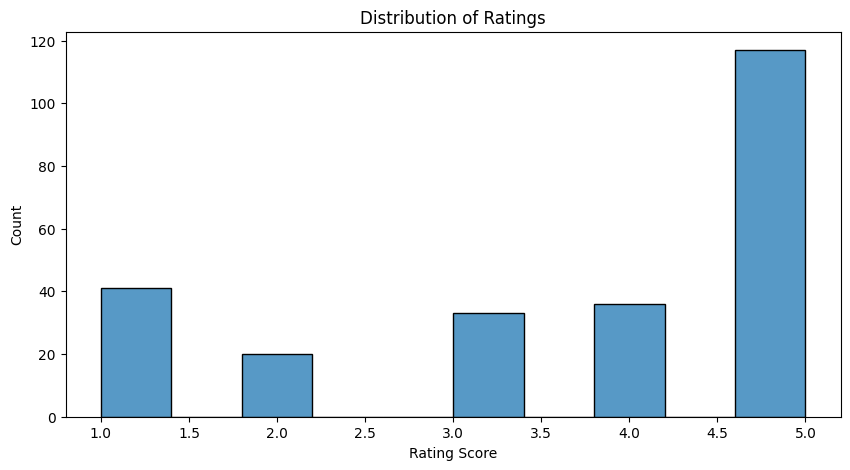

In [55]:
# DO NOT MODIFY THIS CODE
get_histogram(hotelDf)

# Q2

In [56]:
def plot_time_series(df: pd.DataFrame) -> None:
  ## Your code starts here ##

  plt.figure(figsize=(15, 7))

  #plot each hotel's rolling average on separate subplots or consider filtering the hotels.
  for hotel in hotelNames:
      hotel_df = df[df['hotelName'] == hotel].copy()
      hotel_df['date_stamp'] = pd.to_datetime(hotel_df['date_stamp'])
      hotel_df = hotel_df.sort_values('date_stamp')

      #compute the rolling average rating with a window of 5.
      hotel_df['rolling_avg'] = hotel_df['ratingScore'].rolling(window=5).mean()

      plt.plot(hotel_df['date_stamp'], hotel_df['rolling_avg'], label=f'Rolling Avg Rating for {hotel}')

  #move the legend outside of the plot area.
  plt.legend(loc='upper left', bbox_to_anchor=(1,1))

  plt.xlabel('Date')
  plt.ylabel('Rolling Average Rating')
  plt.title('Rolling Average Rating over Time for Selected Hotels')
  #adjust the layout to make room for the legend.
  plt.tight_layout()
  plt.show()

  ## end ##

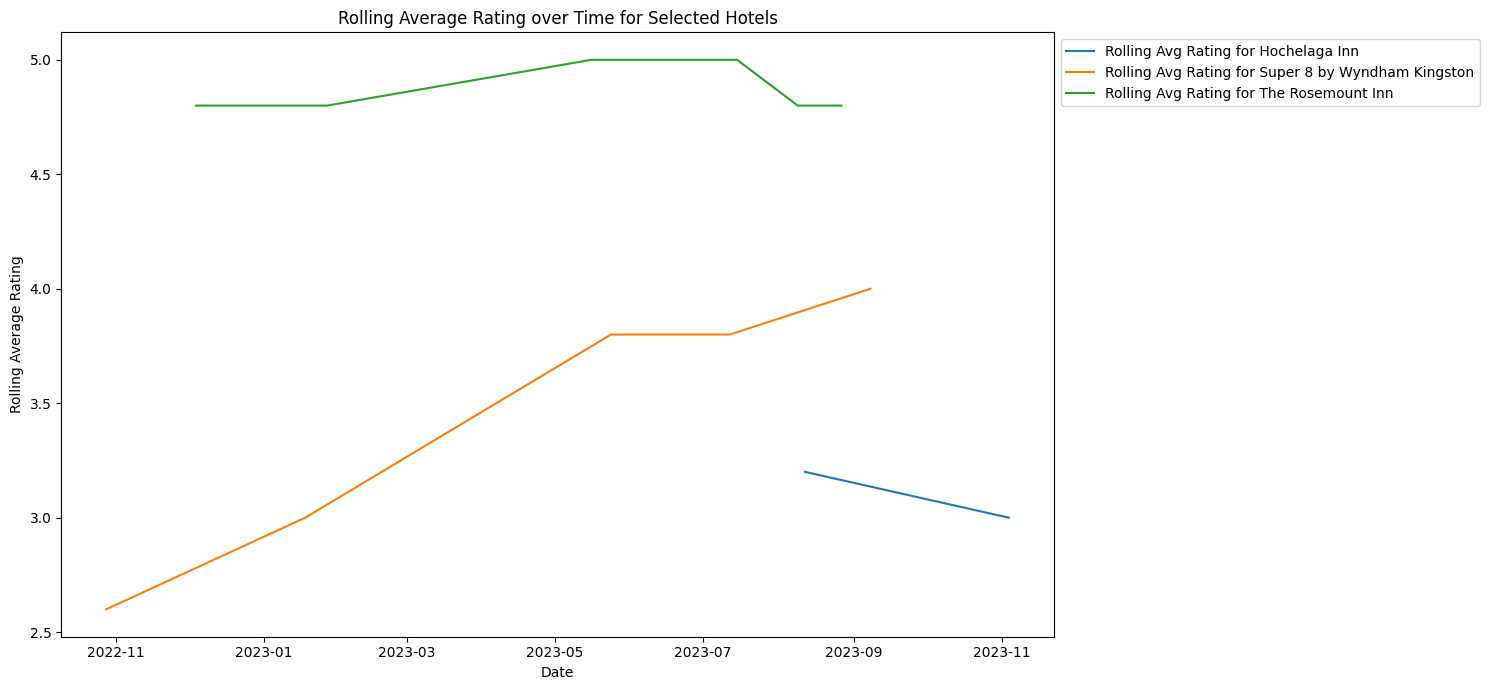

In [57]:
# DO NOT MODIFY THIS CODE
hotelNames = ['Hochelaga Inn', 'Super 8 by Wyndham Kingston', 'The Rosemount Inn']
plot_time_series(hotelDf[hotelDf['hotelName'].isin(hotelNames)])

# Q3

## (a)

In [58]:
# DO NOT MODIFY THIS CODE
def get_stop_words():
  stop = set(stopwords.words('english'))
  stop.add('hotel')
  stop.add('room')
  stop.add('rooms')
  stop.add('stay')
  stop.add('staff')
  return stop

def most_frequent_words(df: pd.DataFrame, kwords: int) -> list[tuple[str, int]]:
  ## Your code starts here ##
  text = ' '.join(df['reviewColumn'].tolist()).lower()
  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word not in get_stop_words() and len(word) > 2]
  freq_dist = nltk.FreqDist(filtered_words)
  return freq_dist.most_common(kwords)


  ## end ##
  return topk

In [59]:
# DO NOT MODIFY THIS CODE
topk = most_frequent_words(hotelDf, 500)
topk[:10]

[('clean', 112),
 ('breakfast', 96),
 ('kingston', 87),
 ('great', 80),
 ('one', 80),
 ('good', 79),
 ('friendly', 77),
 ('place', 75),
 ('nice', 75),
 ('would', 74)]

## (b)

In [60]:
## Your code starts here ##
def calculate_mi(df, word):
    N = len(df)
    N_1 = sum(df['reviewColumn'].str.contains(r'\b{}\b'.format(word), regex=True, case=False))
    N_1_ = N - N_1
    N_11 = sum((df['groundTruth'] == 'positive') & df['reviewColumn'].str.contains(r'\b{}\b'.format(word), regex=True, case=False))
    N_10 = N_1 - N_11
    N_01 = sum((df['groundTruth'] == 'positive')) - N_11
    N_00 = N_1_ - N_01

    #avoiding division by zero, by adding a small value to denominators (smoothing)
    mi = (N_11/N) * np.log2((N * N_11 + 1) / ((N_1 + 1) * (N_01 + N_11 + 1))) if N_11 > 0 else 0
    mi += (N_01/N) * np.log2((N * N_01 + 1) / ((N_1_ + 1) * (N_01 + N_11 + 1))) if N_01 > 0 else 0
    mi += (N_10/N) * np.log2((N * N_10 + 1) / ((N_1 + 1) * (N_10 + N_00 + 1))) if N_10 > 0 else 0
    mi += (N_00/N) * np.log2((N * N_00 + 1) / ((N_1_ + 1) * (N_10 + N_00 + 1))) if N_00 > 0 else 0

    return mi

#using the most_frequent_words function from a previous example to get the top 500 words
top_words = most_frequent_words(hotelDf, 500)
mi_scores = [(word, calculate_mi(hotelDf, word)) for word, _ in top_words]
mi_df = pd.DataFrame(mi_scores, columns=['Word', 'MI_Score']).sort_values(by='MI_Score', ascending=False)
print(mi_df.head(5))

## end ##

     Word  MI_Score
3   great  0.078944
99  dirty  0.072584
0   clean  0.050683
42  floor  0.036929
92   said  0.035273


## (c)

In [61]:
def calc_pmi(df: pd.DataFrame, word: str) -> pd.DataFrame:
  ## Your code starts here ##

  total_reviews = df.shape[0]
  word_reviews = df['reviewColumn'].apply(lambda text: word in text.lower()).sum()
  positive_reviews = df[df['groundTruth'] == 'positive'].shape[0]
  positive_word_reviews = df[df['groundTruth'] == 'positive']['reviewColumn'].apply(lambda text: word in text.lower()).sum()

  #smoothing to prevent division by zero
  smoothing_factor = 1
  p_word = (word_reviews + smoothing_factor) / (total_reviews + smoothing_factor)
  p_positive = (positive_reviews + smoothing_factor) / (total_reviews + smoothing_factor)
  p_word_positive = (positive_word_reviews + smoothing_factor) / (total_reviews + smoothing_factor)

  pmi = np.log2(p_word_positive / (p_word * p_positive))

  return pd.DataFrame({'word': [word], 'PMI': [pmi]})

  ## end ##
  return pmidf

In [65]:
# calc_pmi for "great"

pmi_great = calc_pmi(hotelDf, 'great')
pmi_great

,word,PMI
0,great,0.545391


In [64]:
# calc_pmi for "dirty"

pmi_dirty = calc_pmi(hotelDf, 'dirty')
pmi_dirty

,word,PMI
0,dirty,-3.400053


## (d)

In [66]:
# DO NOT MODIFY ANY CODE IN THIS CELL

# to make the results more useable, we clean up the tree results shown above.
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):

        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case...
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [67]:
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns

    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

# DO NOT MODIFY THIS CODE
chunker = nltk.RegexpParser(grammar)

In [68]:
def getTopKNP(df: pd.DataFrame, kNPs: int) -> list[tuple[str, int]]:
  ## Your code starts here ##

  #flattening the list of sentences into a list of words with POS tags
  sentences = df['reviewColumn'].apply(lambda review: nltk.pos_tag(nltk.word_tokenize(review)))

  #extracting noun phrases from tagged sentences
  noun_phrases = []
  for sent in sentences:
    tree = chunker.parse(sent)
    terms = get_terms(tree)
    noun_phrases.extend(flatten_phrase_lists(terms))

  #count the freq of noun phrases
  np_counts = Counter(noun_phrases)

  #get most common noun phrases
  topk = np_counts.most_common(kNPs)

  ## end ##
  return topk

In [69]:
# Print top 10 most common noun phrases
top_noun_phrases = getTopKNP(hotelDf, 50)
top_noun_phrases_df = pd.DataFrame(top_noun_phrases, columns=['Noun Phrase', 'Frequency'])
print(top_noun_phrases_df.head(10))

     Noun Phrase  Frequency
0     front desk         32
1      next time         10
2    great locat          9
3    coffe maker          9
4    comfort bed          8
5  air condition          8
6       park lot          6
7     mini fridg          6
8  green acr inn          6
9   great experi          5


## (e)

In [70]:
## Your code starts here ##
def pmi(df, phrase, sentiment='positive'):
    total_reviews = len(df)
    sentiment_reviews = df[df['groundTruth'] == sentiment]
    p_phrase = (df['reviewColumn'].str.contains(r'\b{}\b'.format(re.escape(phrase)), regex=True, case=False).sum() + 1) / total_reviews
    p_sentiment = len(sentiment_reviews) / total_reviews
    p_phrase_sentiment = (sentiment_reviews['reviewColumn'].str.contains(r'\b{}\b'.format(re.escape(phrase)), regex=True, case=False).sum() + 1) / total_reviews
    return np.log2(p_phrase_sentiment / (p_phrase * p_sentiment))

#filtering hotels with at least 15 reviews
hotels_review_counts = hotelDf.groupby('hotelName').size()
hotels_with_enough_reviews = hotels_review_counts[hotels_review_counts >= 15].index

#calculating average rating for each hotel
hotelDf['ratingScore'] = hotelDf['ratingScore'].astype(float) #making sure ratings are float
average_ratings = hotelDf[hotelDf['hotelName'].isin(hotels_with_enough_reviews)].groupby('hotelName')['ratingScore'].mean()

#finding the highest and lowest rated hotels
highest_rated_hotel = average_ratings.idxmax()
lowest_rated_hotel = average_ratings.idxmin()

#extracting reviews for the highest and lowest rated hotels
highest_rated_reviews = hotelDf[hotelDf['hotelName'] == highest_rated_hotel]
lowest_rated_reviews = hotelDf[hotelDf['hotelName'] == lowest_rated_hotel]

#extracting noun phrases for these hotels
top_noun_phrases_highest = getTopKNP(highest_rated_reviews, 50)
top_noun_phrases_lowest = getTopKNP(lowest_rated_reviews, 50)

## end ##

In [71]:
# Top Hotel Positive PMI
pmi_noun_phrases_highest_positive = [(phrase, pmi(highest_rated_reviews, phrase, 'positive')) for phrase, _ in top_noun_phrases_highest[:5]]
pmi_highest_positive_df = pd.DataFrame(pmi_noun_phrases_highest_positive, columns=['Noun Phrase', 'PMI_Positive'])
print("Top Hotel Positive PMI:")
print(pmi_highest_positive_df)

Top Hotel Positive PMI:
   Noun Phrase  PMI_Positive
0    resid inn      0.064130
1   front desk     -0.257798
2    next time     -0.520832
3  super clean      0.064130
4  great place      0.064130


In [72]:
# Top Hotel Negative PMI
pmi_noun_phrases_highest_negative = [(phrase, pmi(highest_rated_reviews, phrase, 'negative')) for phrase, _ in top_noun_phrases_highest[:5]]
pmi_highest_negative_df = pd.DataFrame(pmi_noun_phrases_highest_negative, columns=['Noun Phrase', 'PMI_Negative'])
print("\nTop Hotel Negative PMI:")
print(pmi_highest_negative_df)


Top Hotel Negative PMI:
   Noun Phrase  PMI_Negative
0    resid inn      4.523562
1   front desk      3.201634
2    next time      3.938599
3  super clean      2.201634
4  great place      2.938599


In [73]:
# Bottom Hotel Positive PMI
pmi_noun_phrases_lowest_positive = [(phrase, pmi(lowest_rated_reviews, phrase, 'positive')) for phrase, _ in top_noun_phrases_lowest[:5]]
pmi_lowest_positive_df = pd.DataFrame(pmi_noun_phrases_lowest_positive, columns=['Noun Phrase', 'PMI_Positive'])
print("\nBottom Hotel Positive PMI:")
print(pmi_lowest_positive_df)


Bottom Hotel Positive PMI:
   Noun Phrase  PMI_Positive
0   spider web      1.678072
1   great view      1.678072
2     next day      0.678072
3  credit card      0.678072
4    queen bed      1.678072


In [74]:
# Bottom Hotel Negative PMI
pmi_noun_phrases_lowest_negative = [(phrase, pmi(lowest_rated_reviews, phrase, 'negative')) for phrase, _ in top_noun_phrases_lowest[:5]]
pmi_lowest_negative_df = pd.DataFrame(pmi_noun_phrases_lowest_negative, columns=['Noun Phrase', 'PMI_Negative'])
print("\nBottom Hotel Negative PMI:")
print(pmi_lowest_negative_df)


Bottom Hotel Negative PMI:
   Noun Phrase  PMI_Negative
0   spider web      0.540568
1   great view     -1.044394
2     next day      0.540568
3  credit card      0.540568
4    queen bed     -0.459432


# Q4

## (a)

In [75]:
## Your code goes here ##
grammar = r"""
  NP: {<DT>?<JJ.*>*<NN.*>+}
"""
# DO NOT MODIFY THIS CODE
chunker = nltk.RegexpParser(grammar)

## (b)

In [76]:
## Your code starts here ##

top_noun_phrases = getTopKNP(hotelDf, 50)

def calculate_pmi_for_phrases(df, phrases, sentiment='positive'):
    #calculating total number of reviews
    total_reviews = len(df)

    #calculating the number of positive or negative reviews
    sentiment_reviews = df[df['groundTruth'] == sentiment]
    p_sentiment = len(sentiment_reviews) / total_reviews

    #calculating PMI for each phrase
    pmi_list = []
    for phrase, _ in phrases:
        p_phrase = sum(df['reviewColumn'].str.contains(r'\b{}\b'.format(re.escape(phrase)), regex=True, case=False)) / total_reviews
        p_phrase_sentiment = sum(sentiment_reviews['reviewColumn'].str.contains(r'\b{}\b'.format(re.escape(phrase)), regex=True, case=False)) / total_reviews
        pmi = np.log2(p_phrase_sentiment / (p_phrase * p_sentiment)) if p_phrase_sentiment > 0 else -np.inf
        pmi_list.append((phrase, pmi))

    return pmi_list

## end ##

In [77]:
# Positive PMI
pmi_positive_phrases = calculate_pmi_for_phrases(hotelDf, top_noun_phrases, 'positive')
pmi_positive_df = pd.DataFrame(pmi_positive_phrases, columns=['Noun Phrase', 'PMI']).sort_values(by='PMI', ascending=False)
print(pmi_positive_df.head(5))

        Noun Phrase       PMI
15       great view  0.690979
39  great breakfast  0.690979
11      great place  0.690979
19      super clean  0.690979
48      water slide  0.690979


In [78]:
# Negative PMI
pmi_negative_phrases = calculate_pmi_for_phrases(hotelDf, top_noun_phrases, 'negative')
pmi_negative_df = pd.DataFrame(pmi_negative_phrases, columns=['Noun Phrase', 'PMI']).sort_values(by='PMI', ascending=False)
print(pmi_negative_df.head(5))


    Noun Phrase       PMI
47  first floor  1.393778
46    last time  1.393778
17  credit card  1.393778
41    next door  0.808816
29  third floor  0.808816


## (c)

Answer: PMI analysis helps to find out noun phrases that are closely related to positive or negative sentiments in hotel reviews. The phrases with high positive PMI usually occur in good reviews, but the ones with high negative PMI are typically found in bad reviews. Analyzing high negative PMI phrases helps to identify frequent guest complaints, providing the hotel with areas to work on.

